Manifold Learning Hands On:
    1. Create Toy datasets.
    2. Implement Manifold Learning algorithms (ISOMAP) on data.
    3. Comparison of results with PCA.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

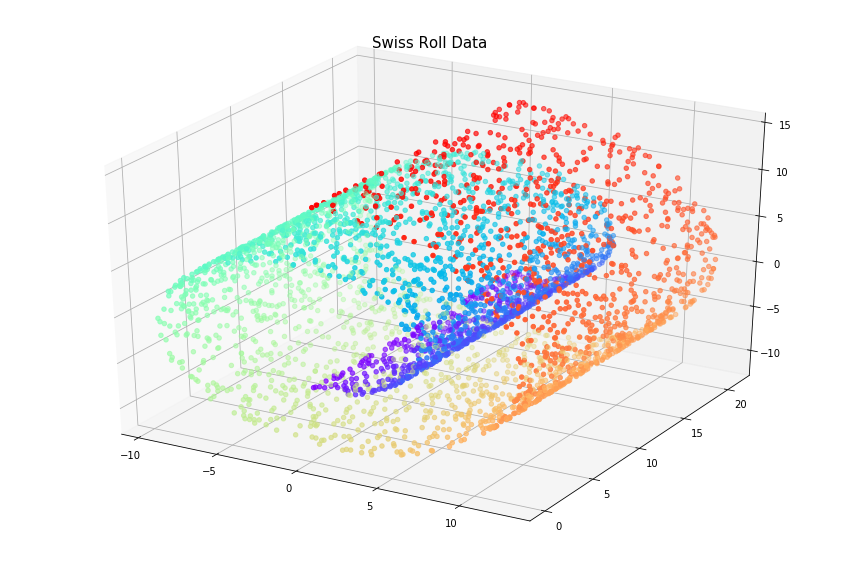

In [25]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=4000)


fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.get_cmap('rainbow'))

ax.set_title("Swiss Roll Data", fontsize=15)
plt.show()

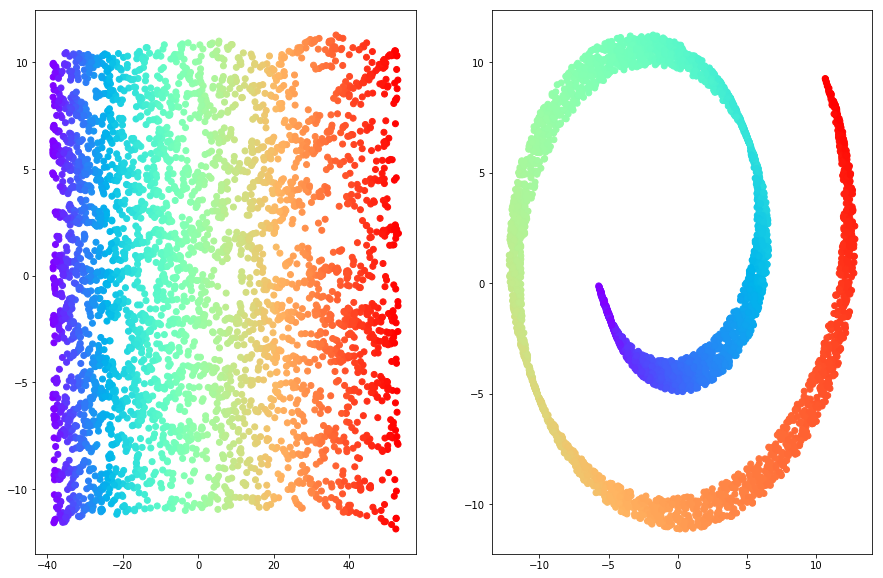

In [26]:
X_iso = Isomap(n_neighbors=12, n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,2,1)
plt.scatter(X_iso[:,0], X_iso[:,1], c=color, cmap=plt.cm.get_cmap('rainbow'))
fig.add_subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=color, cmap=plt.cm.get_cmap('rainbow'))


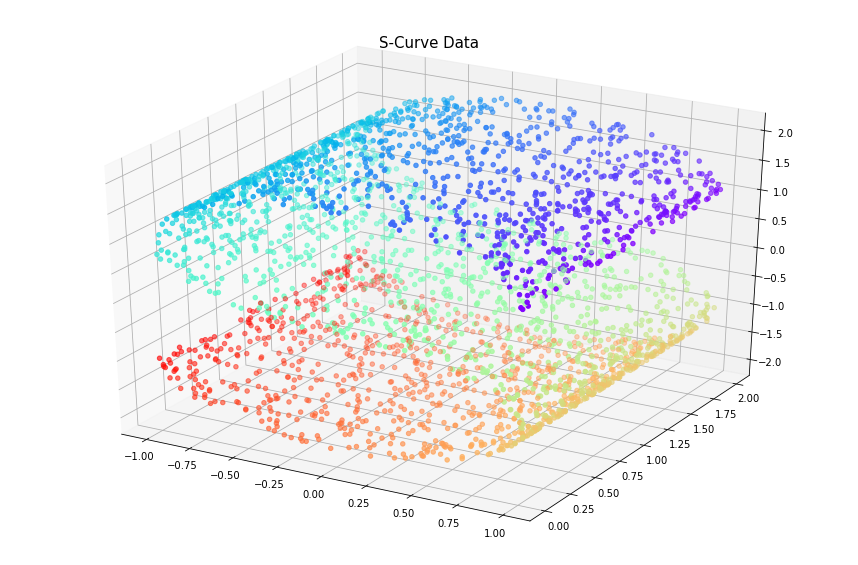

In [27]:
X, color = datasets.samples_generator.make_s_curve(n_samples=3000)


fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.get_cmap('rainbow'))

ax.set_title("S-Curve Data", fontsize=15)
plt.show()

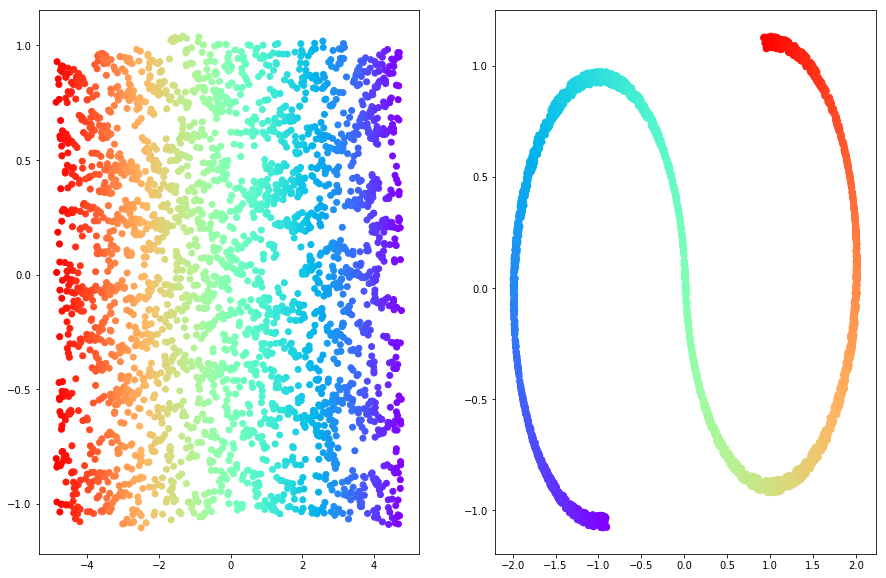

In [28]:
X_iso = Isomap(n_neighbors=12, n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,2,1)
plt.scatter(X_iso[:,0], X_iso[:,1], c=color, cmap=plt.cm.get_cmap('rainbow'))
fig.add_subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=color, cmap=plt.cm.get_cmap('rainbow'))


In [46]:
data = pd.read_csv('mnist_data.csv', names=range(784), header=None)
labels = pd.read_csv('mnist_labels.csv', names=['labels'])
data['labels'] = labels
data = data[:6000]

In [47]:
pca = PCA(n_components=2)
data_transformed = pca.fit_transform( data[data.columns.difference(['labels'])] )
data_transformed = pd.DataFrame(data_transformed, columns=['F1', 'F2'])

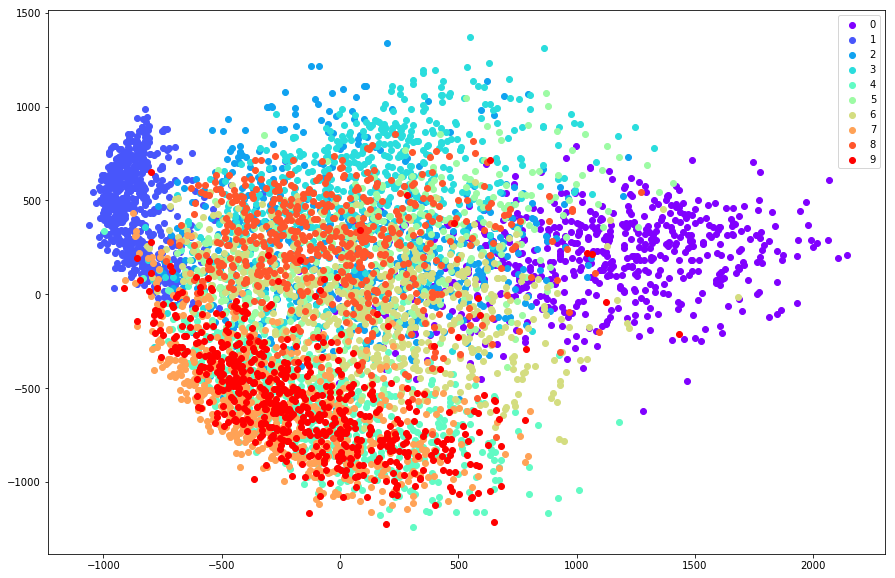

In [48]:
plt.figure(figsize=(15,10))

colors = plt.cm.rainbow(np.linspace(0, 1, 10))
for i in range(10):
    c = colors[i]
    data_class = data_transformed[data['labels']==i]
    plt.scatter(data_class['F1'], data_class['F2'], c=c, label=i)
plt.legend()

In [49]:

manifold = Isomap(n_neighbors=10, n_components=2)
data_transformed = manifold.fit_transform(data) 
data_transformed = pd.DataFrame(data_transformed, columns=['F1', 'F2'])

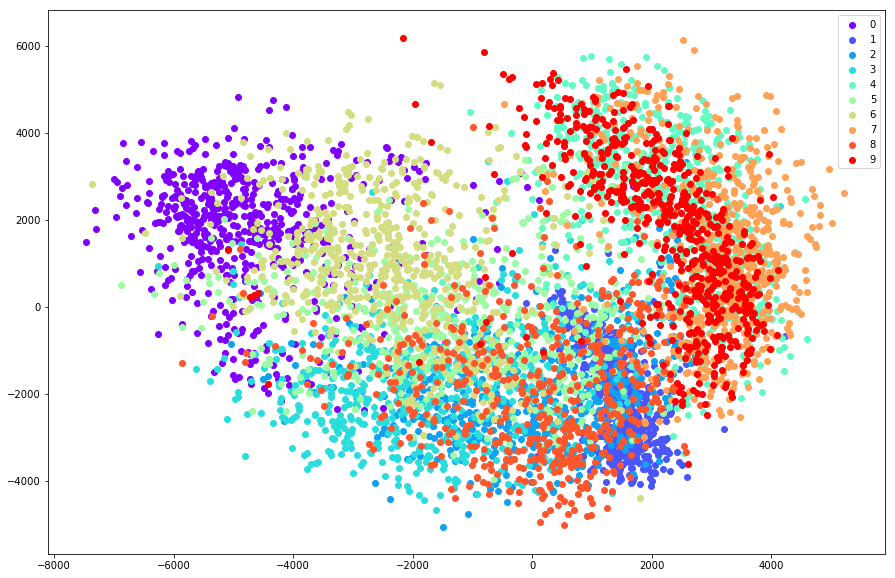

In [50]:
plt.figure(figsize=(15,10))

colors = plt.cm.rainbow(np.linspace(0, 1, 10))
for i in range(10):
    c = colors[i]
    data_class = data_transformed[data['labels']==i]
    plt.scatter(data_class['F1'], data_class['F2'], c=c, label=i)
plt.legend()

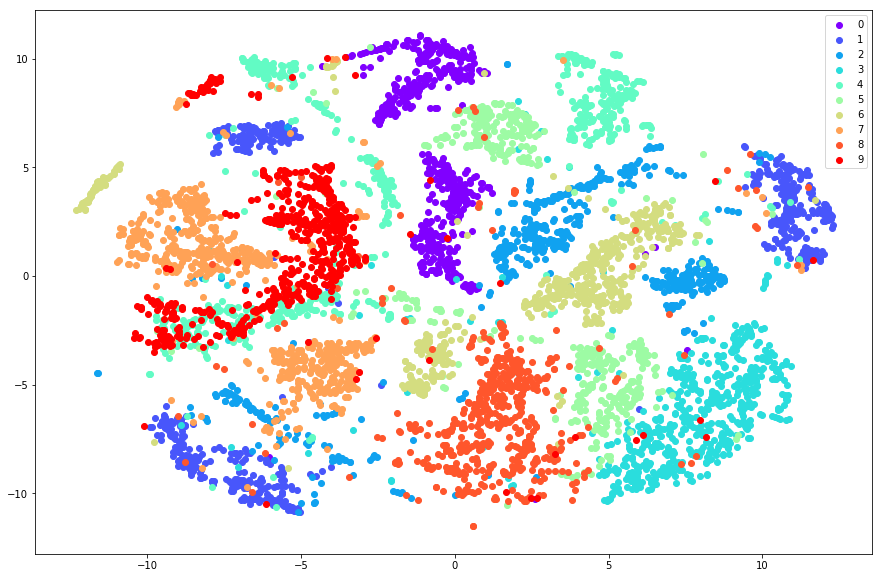

In [54]:
from sklearn.manifold import TSNE

manifold = TSNE(n_components=2)
data_transformed = manifold.fit_transform(data) 
data_transformed = pd.DataFrame(data_transformed, columns=['F1', 'F2'])

plt.figure(figsize=(15,10))

colors = plt.cm.rainbow(np.linspace(0, 1, 10))
for i in range(10):
    c = colors[i]
    data_class = data_transformed[data['labels']==i]
    plt.scatter(data_class['F1'], data_class['F2'], c=c, label=i)
plt.legend()

# PRACTICE QUESTION

1. Use the MNIST dataset (first 1000 rows) tune the value of n_neighbors parameter for Isomap (n_components=5) with a 
decision tree classifier.
2. For the selected parameter, plot the accuracies on the test data for n_components = [2,5,10,20,50,100]
3. Use PCA and plot the accuracies on the test data for n_components = [2,5,10,20,50,100]. 
4. Compare the results of Q2 and Q3.